# EDSA - Climate Change Belief Analysis 2022
Predict a# Team_ES3 Climate Change Belief Analysis 2022

Predict an individual’s belief in climate change based on historical tweet data

###### Members
1. Oguntuwase Samson
2. Jeff Ouma
3. Odukoya Adewale Daniel
4. Thapelo Mofokeng
5. Adebayo Salaudeen

# Table of Contents

* 1. Introduction
    - 1.1 Predict Overview
    - 1.2 Data Description
* 2. Imports
* 3. Importing the dataset
* 4. Exploratory Data Analysis
* 5 Distribution of target variable
    - 5.1 Visualising a corpus for each sentiment class:
* 6 Data Preprocessing

    
* 7 Feature Engineering and Modelling 
    - 7.1 Naive Bayes classifier
    - 7.2 SVC and linear SVC classifier
    - 7.3 Logistic Regression classifier
    - 7.4 K. Nearest Neighbor classifier
    - 7.5 Decision Tree Neighbor classifier
    - 7.6 Random Forest classifier
* 8 Model performance
    - 8.1 Parameters Tuning
* 9. Generating a submission file

* 10 Conclusion

* 11. References
    

# 1. INTRODUCTION
## PREDICT OVERVIEW

### Predict an individual’s belief in climate change based on historical tweet data
#### Problem statement

###### Using Twitter to measure the impact of climate change:
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging Team_ES3  during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.
<div align="center" style="width: 500px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://media.tenor.com/images/47d160eabb0927ed23827ab099ee83c3/tenor.gif"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=500px/>

<a id="2"></a>

# **2. Imports**
Will import necessary packages for data manupulation e.g numpy, data viewing e.g pandas, plotting e.g matplot library, seaborn and additional packages for text processing and numerical computations

In [298]:
#We will be using Comet as a form of version control throughout the development of our model
#from comet_ml import Experiment

In [299]:
#import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="5daMWTIbLpYB3Nv6TNow78BbJ",
    project_name="general",
    workspace="sampsonola",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: keras, tensorboard, sklearn, tensorflow. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sampsonola/general/725ff49085844709a471c62a54de779a
COMET INFO:   Uploads:
COMET INFO:     conda-info          : 1
COMET INFO:     conda-specification : 1
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: Comet has disabled auto-logging functional

In [300]:
#packages for general processing of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
import re
import colorama
from colorama import Fore, Back, Style
import warnings
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from statistics import *
from plotly import tools
from tqdm import tqdm
import csv
import nltk
import spacy
import string
# set plot style
sns.set()
sns.set(font_scale=1.5)

#packages for natural language processing
nlp = spacy.blank('en')
nlp = spacy.blank('zh')
nlp = spacy.blank('xx') # multilanguage (spaCy provides support for languages) 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
lemmatizer = WordNetLemmatizer()
import string
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Packages for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier



#packages for checking the performance of the models used
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#packages for web scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re


#packages for balancing our data
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SAMSON\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="3"></a>
# **3. Importing the dataset**
We are ready with all the packages required for the data processing. The next step is to import the available data for analysis.
>For the purpose of this project, we have been provided with the following data:
>1. df_train.csv :- This data wil be using for training our model
>2. df_test.csv :- This data will test our model for the purpose of kaggle competition
>3. Sample_submission.csv :- Contain a sample submission on kaggle

In [301]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

In [302]:
# let's examine the first five (5) row of the train data
df_train.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [303]:
# the first five for the test data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="4"></a>

# **4. Exploratory Data Analysis**
The following section provides an overview of the given data. We looks at  some key insights of the raw data as well as the sentiment distribution of the data. In addition we will visualise the word frequency of messages of the unprocessed train and test data.
We will try to dig deep into both the training and testing data to ensure that our data meets the following:
>1. Correctly formatted
>2. Have the correct data types
>3. No null values
>4. Correctly distributed ie normally distributed
>5. No coliniarity for classification problem or no multicoliniarity for regression problem

Exploratory data analysis is the key that will lead us to feature engineering and choosing the right machine learning algorithm for our data

In [304]:
#We start by checking the features available in our training data
df_train.head()

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [305]:
df_train.shape

(30759, 3)

In [306]:
# let check for missing value in the test and train data
df_train.isnull().sum(axis=0)

sentiment    0
message      0
tweetid      0
dtype: int64

In [307]:
df_test.isnull().sum(axis=0)

message    0
tweetid    0
dtype: int64

In [308]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


In [309]:
#we also check the column names as follows
print(df_train.columns.to_list())

['sentiment', 'message', 'tweetid']


In both cases, we see three columns i:e sentiment(the y variable based on the predict), message and tweetid (the unique identification of each entry)

In [310]:
#lets see the columns for the test data
print(df_test.columns.to_list())

['message', 'tweetid']


It makes sense for the test data to lack sentiment i.e the y variable. This means we are good to go

For us to know how to tweek this data for best prediction results. We seek to understand the trends within our features. will check for the following:
> 1. Punctuation 
> 2. stopwords words
> 3. Single Words being used in singular and plural plural form.
> 4. Check for links

In [311]:
#will create a random set of data for our analysis. Will majorly focus on the message feature

import random # random will help fetch random index

#we dont want to interfear with the index of our dataset here, we therefore make a copy for our analysis here
eda_df = df_train.copy()

#for our plan to work as expected, will need to rearange the index of our data set
eda_df = eda_df.reset_index().drop('index', axis = 1)

n = len(eda_df.index.to_list()) #n represent the total number of observations in the whole data set

#we make a list of 10 randomly chosen index from our data
i = 0
check_list = []
while i<10:
    j = random.randint(0,n)
    check_list.append(j)
    i = i+1  

#we make a list of random data from the 10 randomly chosen index
random_data = []
for i in check_list:
    random_data.append(eda_df.message[i].split())
    
plain_random_data = []
for i in random_data:
    for k in i:
        plain_random_data.append(k)
        
#the study data is now redy for use and are stored in a variable called plain_random_data. Lets dive in

In [312]:
#we check the subset of the availabledata and see what operations we can perform
plain_random_data[:5]

['RT', '@NatGeoChannel:', 'Watch', '#BeforeTheFlood', 'right']

1. Checking for punctuations

In [313]:
import string

#we split the punctuations from the tring
punctuations = []
l = string.punctuation
for i in l:
    punctuations.append(i)

#create a bag of letters for analysis
bag_of_letters = []
for i in plain_random_data:
    for k in i:
        bag_of_letters.append(k)

#we create a list of all available punctuations for futher use as well
total_punctuations = []
for i in bag_of_letters:
    if i in punctuations:
        total_punctuations.append(i)

Total punctuations = 63/1052 letters
This accounts to  5.988593155893536%


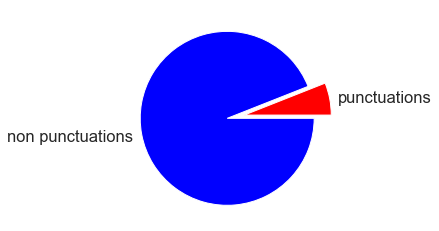

In [314]:
##lets check if we manage to catch some punctuations in our sample

print(f'Total punctuations = {len(total_punctuations)}/{len(bag_of_letters)} letters')
print(f'This accounts to  {(len(total_punctuations)/len(bag_of_letters))*100}%')

percentage_punctuations = np.round((len(total_punctuations)/len(bag_of_letters))*100, 2)

plt.pie([percentage_punctuations, 100-percentage_punctuations], 
        labels=['punctuations','non punctuations'], explode = [0,0.2], colors = ['red','blue'])
plt.show()

2. checking for stop words

In [315]:
#first we import stopwords and define stopwords_list
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

#we store all available stopwords in our data in a list called available_stopwords
available_stopwords = []
for i in plain_random_data:
    if i in stopwords_list:
        available_stopwords.append(i)

Total stopwords = 47/178 words
This accounts to  26.40449438202247%


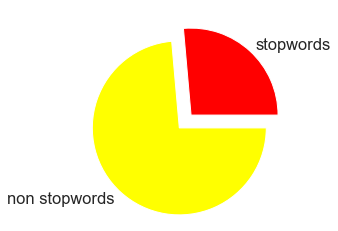

In [316]:
##lets check if we manage to catch some stopwords in our sample

print(f'Total stopwords = {len(available_stopwords)}/{len(plain_random_data)} words')
print(f'This accounts to  {(len(available_stopwords)/len(plain_random_data))*100}%')

percentage_stopwords = np.round((len(available_stopwords)/len(plain_random_data))*100, 2)

plt.pie([percentage_stopwords, 100-percentage_stopwords], 
        labels=['stopwords','non stopwords'], explode = [0,0.2], colors = ['red','yellow'])
plt.show()

In [317]:
#to check for this, we need to know the total number of unique words in our sample and set it to words_unique  variable
total_words_unique = len(np.unique((np.array(plain_random_data))))

#if we therefore perform steming and the total number of unue words reduce, then we can know where to stand

#we import the snowballstemmer and set it to english
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')

#create a list of stemmed sample
new_plain_random_data = []

for i in plain_random_data:
    new_plain_random_data.append(stemmer.stem(i))
    
new_total_words_unique = len(np.unique((np.array(new_plain_random_data))))

Total unique words before steming = 129
Total unique words after steming = 120
This accounts to  6.976744186046517 % of the total words


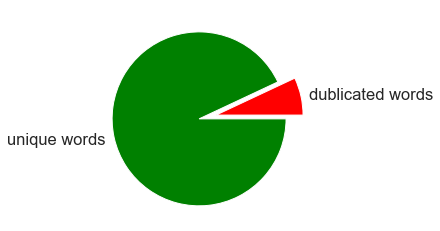

In [318]:
#lets confirm if anything happened
print(f'Total unique words before steming = {total_words_unique}')
print(f'Total unique words after steming = {new_total_words_unique}')
print(f'This accounts to  {100-((new_total_words_unique/total_words_unique)*100)} % of the total words')

#plot a pie chart to show the results
percentage_dublicate_words = np.round(100-((new_total_words_unique/total_words_unique)*100),2)
plt.pie([percentage_dublicate_words, 100-percentage_dublicate_words], 
        labels=['dublicated words','unique words'], explode = [0,0.2], colors = ['red','green'])
plt.show()

4. checking for links

In [319]:
#This code will loop through the sample to get all links  and store them in a variable total_links
total_links = []
for i in plain_random_data:
    if i[:4] in 'http':
        total_links.append(i)

Total available links = 5 links
This account to  2.8089887640449436 % of the total words


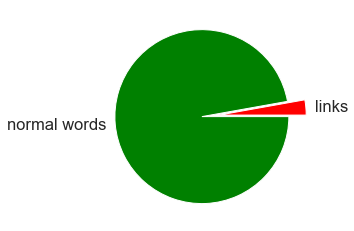

In [320]:
#Lets check if we mange to find some links within our sample
print(f'Total available links = {len(total_links)} links')
print(f'This account to  {(len(total_links)/len(plain_random_data))*100} % of the total words')

percentage_links = np.round((len(total_links)/len(plain_random_data))*100,2)

plt.pie([percentage_links, 100-percentage_links], 
        labels=['links','normal words'], explode = [0,0.2], colors = ['red','green'])
plt.show()

5. checking if we can get something from the links

For this purpose, will try to dig into the available links and check through their title if we can find some information. Will import beautiful soup for the purpose of web scarping.

In [321]:
for i in plain_random_data:
    if i[:4] in 'http':
        try:
            html = urlopen(i)
        except:
            html = 'url_web'
        soup = BeautifulSoup(html)
        try:
            title = soup.title.text
        except AttributeError:
            title = 'url_web'
        except:
            title = 'url_web'
        print(f'{i} == {title}')      

https://t.co/LkDehj3tNn == National Geographic Channel
http://t.co/LMGtRShOV6 == url_web
http:… == url_web
https://t.co/jPWk5vFog8 == G7 talks: Trump isolated over Paris climate change deal - BBC News
https://t.co/ac4egyyE0Z == url_web


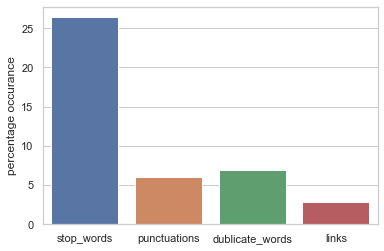

In [322]:
#We plot a graph to show the stats from our sample
percentages = [percentage_stopwords,percentage_punctuations,percentage_dublicate_words,percentage_links]
sns.set_theme(style='whitegrid')
fig = sns.barplot(x = ['stop_words', 'punctuations', 'dublicate_words', 'links'],y = percentages)
fig.set(xlabel ='',ylabel='percentage occurance')
plt.show()

In [323]:
def update(df):

    df = df_train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(df_train)
df.head()

,sentiment,message,tweetid
0,Anti,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,Anti,All the biggest lies about climate change and ...,925046776553529344
2,Anti,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,Anti,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,Anti,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


#### Hashtag extraction 
Hashtags are extracted from the original tweets and stored in seperate dataframes for each class. This is done before tweet cleaning to ensure no information is lost.

In [324]:
def hashtag_extract(tweet):
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

,hashtag,count
32,climate,335
20,climatechange,183
49,BeforeTheFlood,170
21,ActOnClimate,96
15,ParisAgreement,68


In [325]:
def TweetCleaner(tweet):
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
df['message'] = df['message'].apply(TweetCleaner)
df['message'] = df['message'].apply(TweetCleaner)

df.head()

,sentiment,message,tweetid
0,Anti,rt funny as hell canada demands gender rights ...,897853122080407553
1,Anti,all the biggest lies about climate change and ...,925046776553529344
2,Anti,the coming revelation of the q global warming ...,696354236850786305
3,Anti,rt let s see if the world ends when s climate ...,846806509732483072
4,Anti,rt obama has no control over the climate he is...,628085266293653504


In [326]:
# Extract tweets from dataframe & creating a new dataframe with only tweets
raw_tweets = df['message']

# View top 5 rows of raw_tweets
raw_tweets[3010:3015]

3010    be hate inchworm thymes global warming maroon ...
3011    voor veel kunstenaars is cultuurmarxisme een v...
3012    you bet liked the part abt being warned off cl...
3013         rt he q s not kidding about the trump thing 
3014        rt i guess global warming is suju’s fault too
Name: message, dtype: object

#### Tweet cleaning
Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space. The data is further normalized by converting all letters to lowercase.

#### Parts of speech tagging and lemmatization
In this step we start by determining the length of each tweet and storing this information in a new column. We then tokenize the tweets before performing POS tagging on each word followed by lemmatization.

In lemmatization, we reduce the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. Lemmatization is preferred over stemming since stemming is a crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required

In [327]:
def lemma(df):
    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lemma(df)
df.head()

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Anti,rt funny as hell canada demands gender rights ...,897853122080407553,114,"[rt, funny, as, hell, canada, demands, gender,...","[(rt, n), (funny, n), (as, n), (hell, n), (can...",rt funny a hell canada demand gender right and...
1,Anti,all the biggest lies about climate change and ...,925046776553529344,99,"[all, the, biggest, lies, about, climate, chan...","[(all, n), (the, n), (biggest, a), (lies, v), ...",all the big lie about climate change and globa...
2,Anti,the coming revelation of the q global warming ...,696354236850786305,66,"[the, coming, revelation, of, the, q, global, ...","[(the, n), (coming, v), (revelation, n), (of, ...",the come revelation of the q global warming q ...
3,Anti,rt let s see if the world ends when s climate ...,846806509732483072,104,"[rt, let, s, see, if, the, world, ends, when, ...","[(rt, n), (let, n), (s, v), (see, v), (if, n),...",rt let s see if the world end when s climate c...
4,Anti,rt obama has no control over the climate he is...,628085266293653504,87,"[rt, obama, has, no, control, over, the, clima...","[(rt, n), (obama, n), (has, v), (no, n), (cont...",rt obama have no control over the climate he b...


#### Word frequency
Creating separate dataframes to store the 25 most frequent words and their respective frequencies for each class. Once this information has been extracted we will use these words to create wordclouds for each class.

Word clouds are a popular approach in nlp tasks, here they help us visualize and gain a better understanding of what is being said in each class.

In [328]:
def frequency(tweet):
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

# Extract the top 25 words in each class
pro_frequency = frequency(df['lemmatized'][df['sentiment']=='Pro'])
anti_frequency = frequency(df['lemmatized'][df['sentiment']=='Anti'])
news_frequency = frequency(df['lemmatized'][df['sentiment']=='News'])
neutral_frequency = frequency(df['lemmatized'][df['sentiment']=='Neutral'])

In [329]:
# Extract the words in the tweets for the pro and anti climate change classes 
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])

# Create wordcloud for the anti climate change class
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti_words)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(neutral_words)

pro_frequency.tail()

,word,freq
20,need,579
21,denier,575
22,president,559
23,like,552
24,die,533


#### Specific named entity recognition and extraction
Extracting the top 10 organisations, people and geopolitical entities in each class. This information is then stored in separate dataframes for each class.

In [330]:
def entity_extractor(tweet):
    
    def get_people(tweet):  
        words = nlp(tweet)
        people = [w.text for w in words.ents if w.label_== 'PERSON']
        return people
    
    def get_org(tweet):
        words = nlp(tweet)
        org = [w.text for w in words.ents if w.label_== 'ORG']
        return org
    
    def get_gpe(tweet):
        words = nlp(tweet)
        gpe = [w.text for w in words.ents if w.label_== 'GPE']
        return gpe
    
    # Extract the top 10 people
    people = tweet.apply(lambda x: get_people(x)) 
    people = [x for sub in people for x in sub]
    people_counter = Counter(people)
    people_count = people_counter.most_common(10)
    people_count = map(list, zip(*people_count))
    
    # Extract the top 10 organizations
    org = tweet.apply(lambda x: get_org(x)) 
    org = [x for sub in org for x in sub]
    org_counter = Counter(org)
    org_count = org_counter.most_common(10)
    org_count = map(list, zip(*org_count))
    
    # Extract the top 10 geopolitical entities
    gpe = tweet.apply(lambda x: get_gpe(x)) 
    gpe = [x for sub in gpe for x in sub]
    gpe_counter = Counter(gpe)
    gpe_count = gpe_counter.most_common(10)
    gpe_count = map(list, zip(*gpe_count))
    
    # Create a dataframe to store the information
    df = pd.DataFrame({'people' : people})
    df['geopolitics'] = gpe
    df['organizations'] = org
    
    return df

# Extract top entities for each class
anti_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Anti'])
pro_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Pro'])
news_info = entity_extractor(df['lemmatized'][df['sentiment']== 'News'])
neutral_info = entity_extractor(df['lemmatized'][df['sentiment']== 'Neutral'])

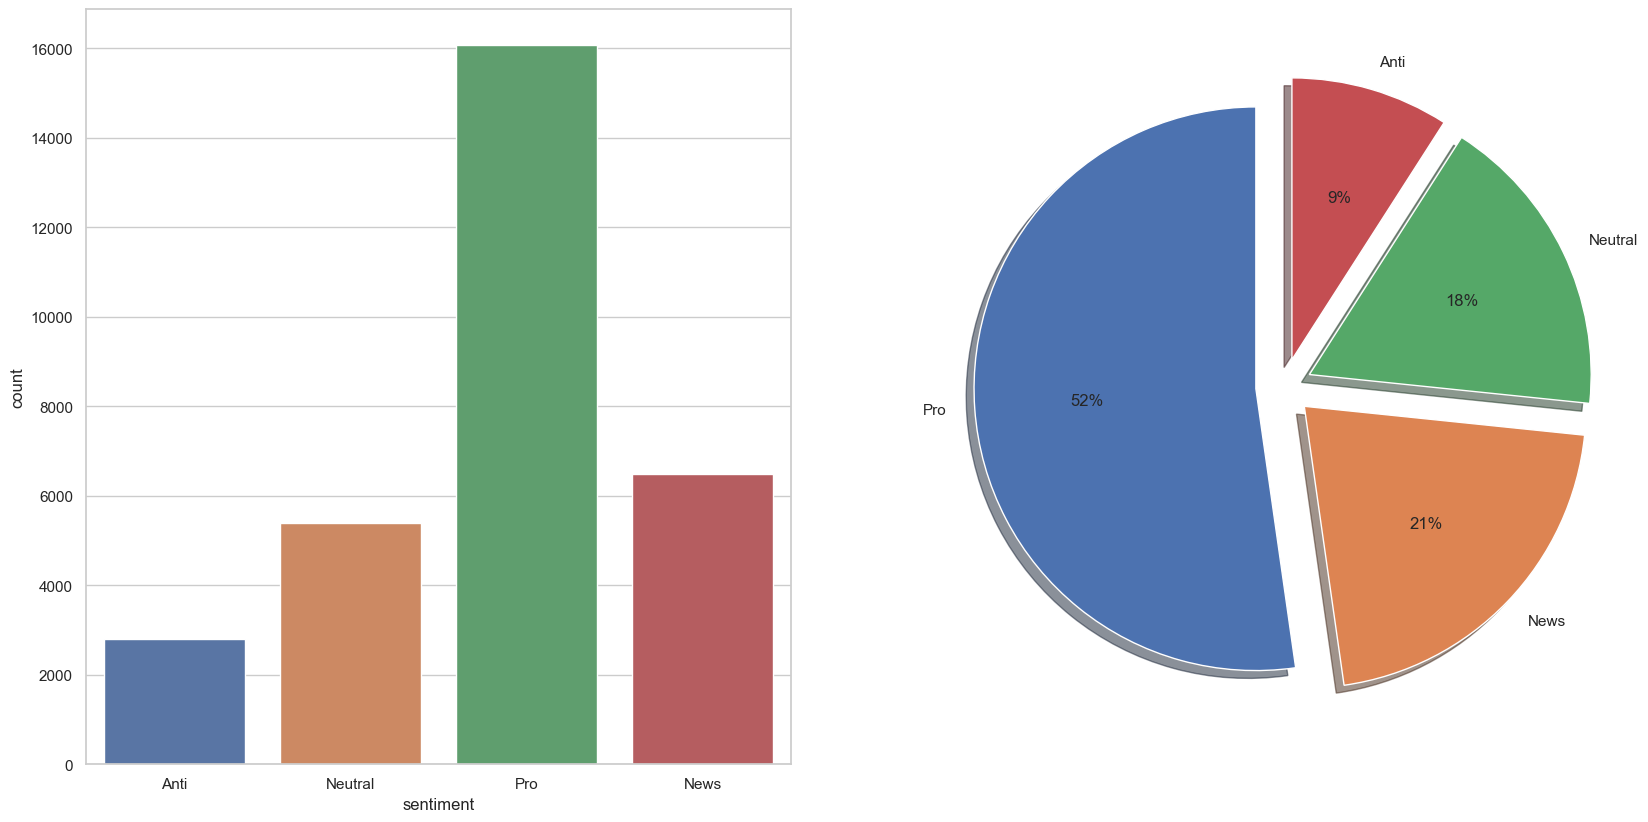

In [331]:
# Display target distribution
#style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.show()

#### Tweet length distribution
From the plots below we can see that tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class. We also notice that neutral climate change tweets tend to have the most variability in tweet length.

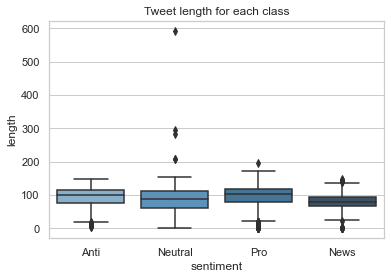

In [332]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

#### Climate change common words
The figures below display the 25 most common words found in the tweets for each classes.

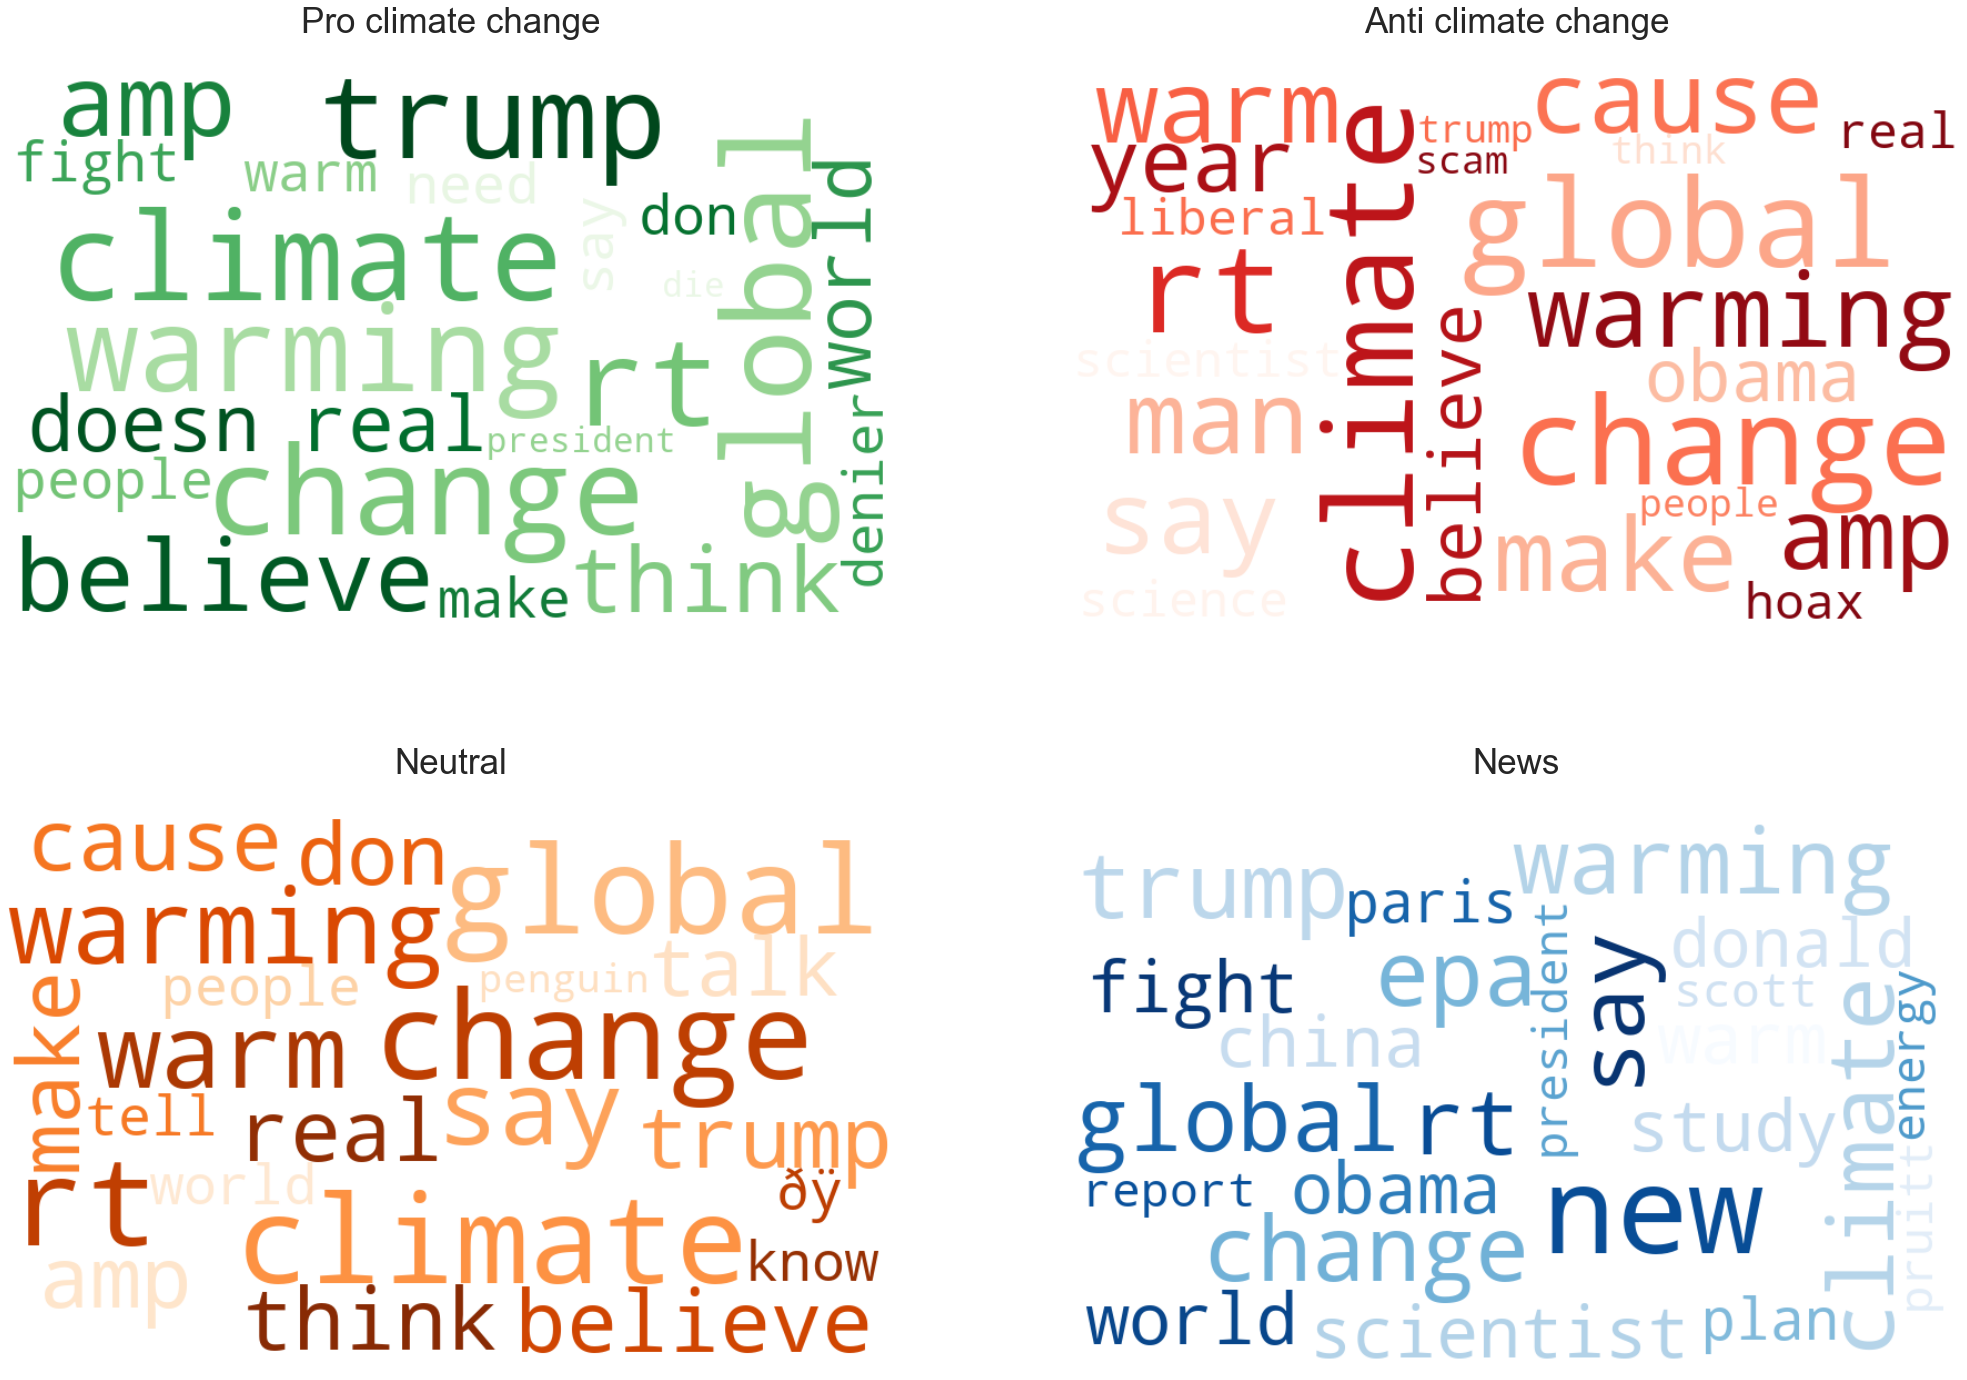

Pro climate change buzzwords 20-25 shown here for clarity 
- The wordcloud doesn't seem to pick up on 'http'


,word,freq
20,need,579
21,denier,575
22,president,559
23,like,552
24,die,533


In [333]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

print("Pro climate change buzzwords 20-25 shown here for clarity \n- The wordcloud doesn't seem to pick up on 'http'")
display(pro_frequency.tail())

#### Hashtags
Hashtags have long been an important tool on Twitter for helping users organize and sort their tweets. They're a great way to indicate that your content is relevant to a certain topic and to get your tweets in front of an interested audience.

Considering this, we decided it might be insightful to see what the most frequent hashtags in each class are. This will help us gain a better understanding of what kind of information is being consumed and shared in each class.

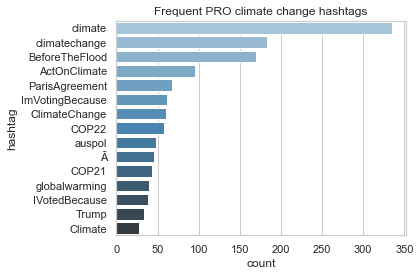

In [334]:
# Plot the frequent hastags for pro and anti climate change classes
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

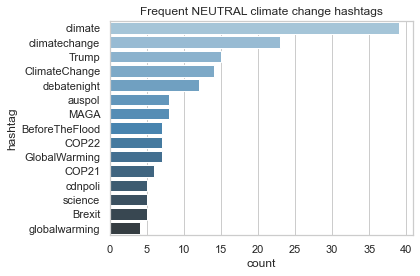

In [335]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("Blues_d"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

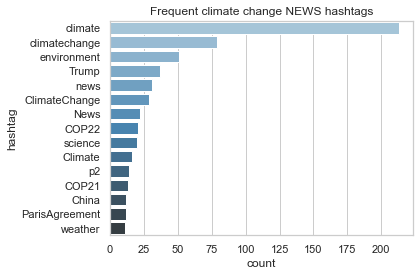

In [336]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtag'], x=news['count'], palette=("Blues_d"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

<a id="5"></a>
# 5. Distribution of the Target variable

### Using the Regex library to clean the raw tweets dataframe:
Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways. For more information on regular expressions.

In [337]:
# Replace email addresses with 'email'
tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Remove unicode strings
tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

# Convert any url to URL
tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))',
                            'website')

# Remove special characters, numbers, punctuation
tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

# Remove additional white spaces
tweets = tweets.str.replace(r'\s+', ' ')
tweets = tweets.str.replace(r'^\s+|\s+?$', '')

# Change words to lower case
tweets = tweets.str.lower()

# Remove stop words from tweets
stop_words = set(stopwords.words('english'))

tweets = tweets.apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

In [338]:
# Creating a dataframe from the cleaned up message column
tweets_df = pd.DataFrame(tweets)

# Add sentiment column to the tweets dataframe
tweets_df['sentiment'] = df_train['sentiment']

# View the top 5 rows of tweets
tweets_df.head()

,message,sentiment
0,rt funny hell canada demands gender rights cli...,-1
1,biggest lies climate change global warming deb...,-1
2,coming revelation q global warming q resembles...,-1
3,rt let see world ends climate change rollback ...,-1
4,rt obama control climate worst snake oil sales...,-1


## 5.1 Visualising a corpus for each sentiment class:

Now we will create a corpus for each sentiment class. In linguistics, a corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

In [339]:
# Create a Corpus for every class sentiment 
news_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweets_df['message']
                       [tweets_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweets_df['message']
                           [tweets_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == -1]])

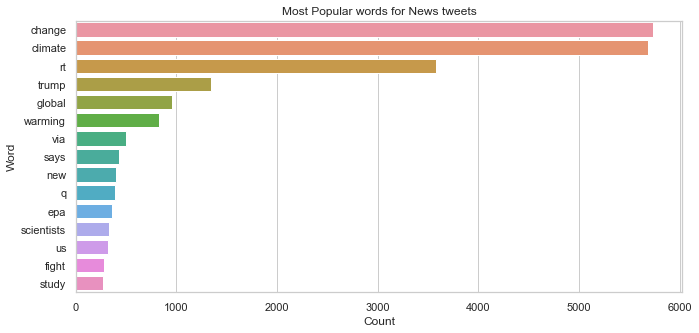

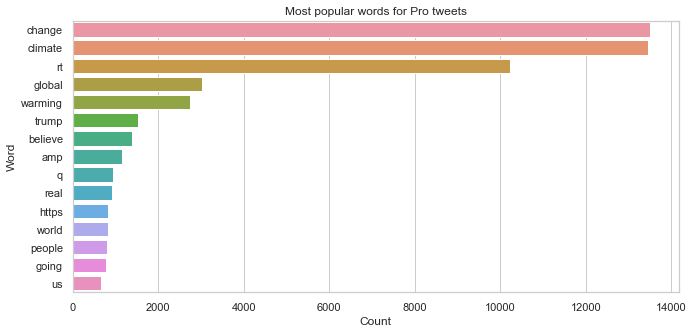

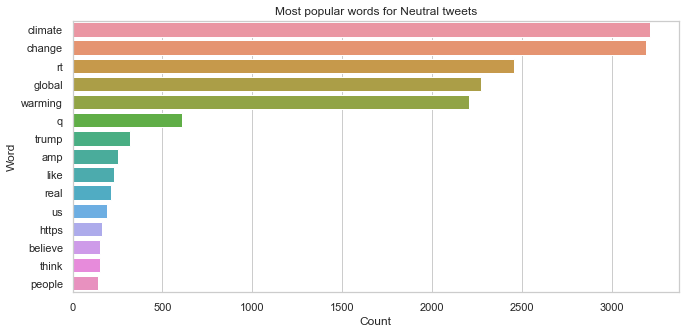

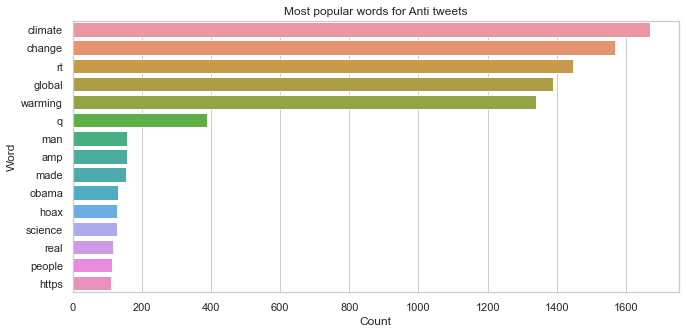

In [340]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

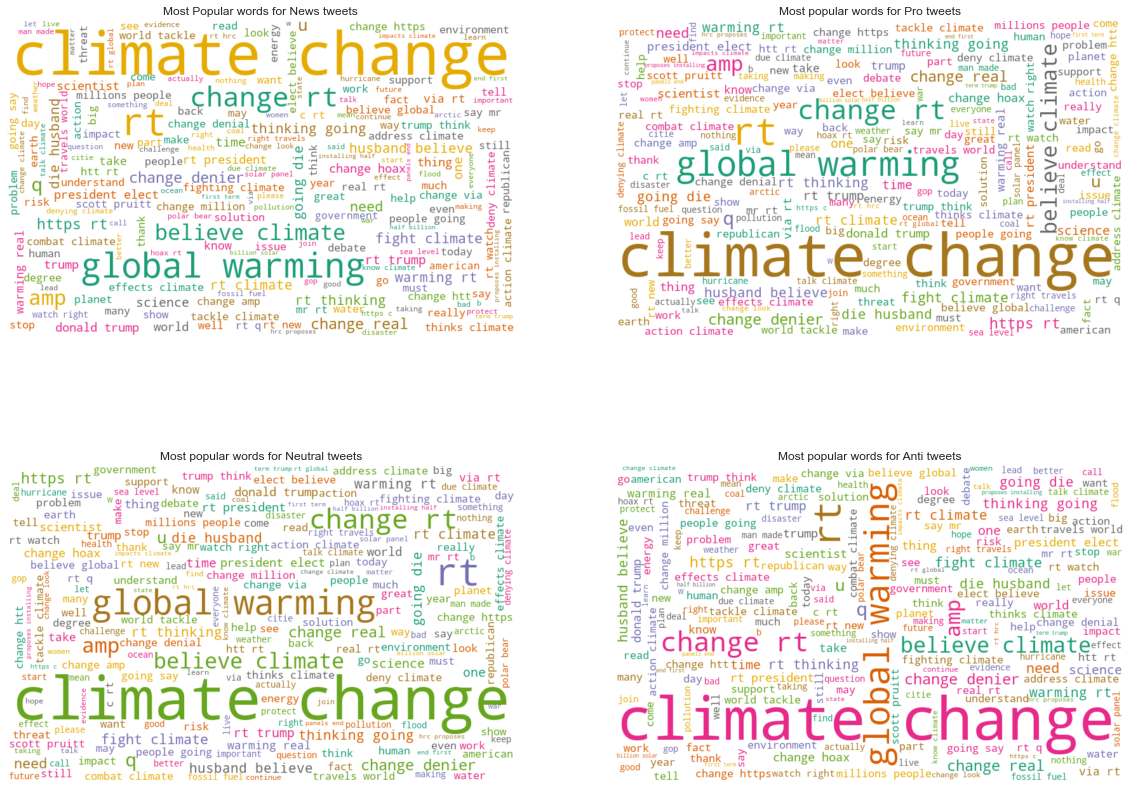

In [341]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=800, height=500, 
               background_color='white', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

Based on the EXPLORATORY DATA ANALYSIS we have carried out, we have realised the following:
1. The data we have is free from Null values: 
> Most machine learning algorithms such as the random forest classifier, logistic regression, suport vector machine etc do not accept data with null values. We therefore aim at removing or filling up null values appropriately before feading our data in any machine learning model.

2. The data is not correctly distributed:
> The total number of responces differ from one y value to another [ -1 has 1296 responses], [0 has 2353 responces], [1 has 8330 responces], [2 has 3640 responces]. This will be a problem to most machine learning algorithms such as the logistic regression. For a model to have equal probability of predicting each given value of y, then the total count of all y responces should be the same during the training time.

3. The data is not correctly formatted:
> Even though there are no null values. The data type of each feature in the training set do not all satisfy the expected data types. The message feature consist of the object data type which will need to be rectified before modeling.

4. There are uninvited visiters in our data:
> stop words and punctuations do impact negatively towards our model's predictive power. We therefore have to remove them in advance before they cause much trouble. 

5. There are some information that can be found in the links.
> Some of these links contain some informations ie the title talking about climate change. Will need to extract them for our analysis.

<a id="6"></a>
# 6 Data Preprocessing

In [249]:
def tweet_preprocessing(tweet):
    
    '''
    This functions cleans tweets from line breaks, URLs, numbers, etc.
    '''
    
    tweet = tweet.lower() #to lower case
    tweet = tweet.replace('\n', ' ') # remove line breaks
    tweet = tweet.replace('\@(\w*)', '') # remove mentions
    tweet = re.sub(r"\bhttps://t.co/\w+", '', tweet) # remove URLs
    tweet = re.sub('\w*\d\w*', '', tweet) # remove numbers
    tweet = re.sub(r'\#', '', tweet) # remove hashtags. To remove full hashtag: '\#(\w*)'
    tweet = re.sub('\w*\d\w*', '', tweet) # removes numbers?
    tweet = re.sub(' +', ' ', tweet) # remove 1+ spaces

    return tweet

After we create a function for preprocessing we must split the data into labels and features (X and y)

In [250]:
# Splitting the labels and features
df_train['processed'] = df_train['message'].apply(tweet_preprocessing)
X = df_train['processed'].values
y = df_train['sentiment'].values

In [251]:
# preprocess testing data by applying our function
df_test['processed'] = df_test['message'].apply(tweet_preprocessing)

<a id="feature"></a>
# Feature Selection

### 7.1 Naive Bayes Classifier 

In [252]:
# Splitting the labels and fetures into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [253]:
from imblearn.pipeline import Pipeline
mnb = Pipeline([('Count',CountVectorizer()),('classify',MultinomialNB())])
#fitting the model
mnb.fit(X_train, y_train)

#apply model on test data
y_pred_mnb = mnb.predict(X_test)

In [254]:
# Classification report
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

          -1       0.82      0.27      0.40       558
           0       0.70      0.28      0.40      1080
           1       0.68      0.91      0.78      3215
           2       0.73      0.69      0.71      1299

    accuracy                           0.69      6152
   macro avg       0.73      0.54      0.57      6152
weighted avg       0.71      0.69      0.66      6152



As we can see the '-1' and '0' class are poorly predicted when using unbalanced data. Once we implement resampling their f1-score increases for these model but only slightly. While at the same time the overall accuracy is slightly reduced.

#### 7.2 SVC and LinearSVC

SVC Provides a best fit to catergorize our data this fit can be nonlinear, while a linearSVC provides a linear interpolation.

In [255]:
from sklearn.svm import SVC
#SVC
svc = Pipeline([('Count',CountVectorizer()),('classify',SVC(max_iter=300,C=1))])

In [256]:
from sklearn.svm import LinearSVC
#linearSVC
linsvc = Pipeline([('Count',CountVectorizer()),('classify',LinearSVC(max_iter=300,C=1))])

In [257]:
# Linear SVC
linsvc.fit(X_train, y_train)
y_pred_lsvc = linsvc.predict(X_test)

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [258]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=1,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=50000))])

# Fit and predict
lsvc_op.fit(X_train, y_train)
y_pred = lsvc_op.predict(X_test)

print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred, y_test) - metrics.accuracy_score(y_pred_lsvc, y_test)) /metrics.accuracy_score(y_pred_lsvc, y_test)),0), 
      '%')

F1 score improved by 5.0 %


In [259]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.57      0.61       558
           0       0.62      0.45      0.52      1080
           1       0.77      0.83      0.80      3215
           2       0.72      0.78      0.75      1299

    accuracy                           0.73      6152
   macro avg       0.69      0.66      0.67      6152
weighted avg       0.72      0.73      0.72      6152



In [264]:
#Saving each metric to add to a dictionary for logging
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

#Create dictionaries for the data we want to log          
metrics = {"f1": f1,
         "precision": precision}

params= ({'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 1,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'})
  # Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# Log image
experiment.log_image(metrics)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

COMET ERROR: invalid image file_type: <class 'dict'>
COMET ERROR: Could not convert image_data into an image; ignored
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sampsonola/general/0db74ea3032a4cc381bb3836ec72453d
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7246735295207093
COMET INFO:     precision : 0.7243766258996606
COMET INFO:   Parameters:
COMET INFO:     classifier              : linear SVC
COMET INFO:     max_df                  : 0.8
COMET INFO:     min_df                  : 1
COMET INFO:     ngram_range             : (1,2)
COMET INFO:     resampling              : no
COMET INFO:     scaling                 : no
COMET INFO:     test_train random state : 0
COMET INFO:     vectorizer              : Tfidf
COMET INFO:   Uploads:
COMET INFO:     conda-info          : 1
COMET IN

#### 7.3 Logistic Regression

Models the discrete probability distribution between classes and classifies based on the inflection point of the curve.

In [171]:
#Logistic Regression
lr = Pipeline([('Count',CountVectorizer()),('classify',LogisticRegression(max_iter=300))])

#### 7.4 K Nearst Neighbor
The KNN classifier assumes that all data points that are close together fall into the same class.K is the number of neighbours. So K=3 implies we will make our predictions based off f the 3 closest points.

In [172]:
#KNN
knn = Pipeline([('Count',CountVectorizer()),('classify',KNeighborsClassifier(n_neighbors=3))])

#### 7.5 Decision Tree

The decision tree uses a tree-like model of decisions and their possible consequences including chance event outcomes, resource costs and utility.Starting from the decision itself (called a "node"), each branch of the decision tree represents a possible decision, outcome, or reaction.

In [174]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
dt = Pipeline([('Count',CountVectorizer()),('classify',DecisionTreeClassifier())])

#### 7.6 Random Forest
Using the decision tree as a base estimator,each estimator is trained on a different bootstrap sample having the same size as the training set. At each node of the forest, features are sampled without replacement to increase randomization. Nodes are split to maximise information gain.

In [175]:
#Random Forest
rf = Pipeline([('Count',CountVectorizer()),('classify',RandomForestClassifier())])

### 8 MODEL PERFORMANCE

In [177]:
from sklearn.model_selection import cross_val_score
num=3
# SVC
scores = cross_val_score(
        svc, X, y, cv=num, scoring='f1_weighted')
print('The average weighted F1 score over '+str(num)+' SVC models is ' + str(sum(scores)/len(scores)))

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



The average weighted F1 score over 3 SVC models is 0.4694022197349497


In [179]:
#Logistic Regression
scores = cross_val_score(
        lr, X, y, cv=num, scoring='f1_weighted')
print('The average weighted F1 score over '+str(num)+' Logistic Regression models is ' + str(sum(scores)/len(scores)))

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\SAMSON\anaconda3\lib\site-packa

The average weighted F1 score over 3 Logistic Regression models is 0.7143258096006063


In [180]:
#KNN
scores = cross_val_score(
        knn, X, y, cv=num, scoring='f1_weighted')
print('The average weighted F1 score over '+str(num)+' KNN models is ' + str(sum(scores)/len(scores)))

The average weighted F1 score over 3 KNN models is 0.42516082575495945


In [181]:
#Decision Tree
scores = cross_val_score(
        dt, X, y, cv=num, scoring='f1_weighted')
print('The average weighted F1 score over '+str(num)+' Decision Tree models is ' + str(sum(scores)/len(scores)))

The average weighted F1 score over 3 Decision Tree models is 0.5919282140878023


In [182]:
#Random Forest
scores = cross_val_score(
        rf, X, y, cv=num, scoring='f1_weighted')
print('The average weighted F1 score over '+str(num)+' KNN models is ' + str(sum(scores)/len(scores)))

The average weighted F1 score over 3 KNN models is 0.6469314983020262


The Logistic Regression Model and the LinearSVC model perform the best. The best performance for every model is found when resampling is not done. This could be because because upsampling the minority classes to the level of the majority class results in too much overfitting.

#### Tuning parameters

We take a look and see if we can improve our best 2 models: linearSVC and Logistic Regression.  

In [183]:
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
param_grid = {
    'C'     : Cs
    }
grid_SVM = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=3)
grid_SVM.fit(CountVectorizer().fit_transform(X), y)
grid_SVM.best_params_

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\SAMSON\anaconda3\lib\site-packa

{'C': 1}

In [184]:
param_grid = {'C'     : Cs }
grid_SVM = GridSearchCV(LinearSVC(), param_grid, scoring='f1_weighted', cv=3)
grid_SVM.fit(CountVectorizer().fit_transform(X), y)
grid_SVM.best_params_

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'C': 0.1}

In [185]:
# create an estimator comprising of several models to improve the F1 score (please note that the code took a long time to run but it worked)
estimators = [
       ('rf', Pipeline([('Count',CountVectorizer(ngram_range=(1,2))),('classify',RandomForestClassifier())])),
         
        ('linsvc', Pipeline([('Count',CountVectorizer(ngram_range=(1,2))),('classify',LinearSVC(C=0.1))])),
         
        ('MNB',Pipeline([('Count',CountVectorizer()),('classify',MultinomialNB())])),
    
        ('lr', Pipeline([('Count',CountVectorizer(ngram_range=(1,2))),('classify',LogisticRegression(C=1))]))]

In [187]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(
        estimators=estimators
    )

#fitting the model
clf.fit(X, y)

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\SAMSON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\SAMSON\anaconda3\lib\site-packa

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('Count',
                                                 CountVectorizer(ngram_range=(1,
                                                                              2))),
                                                ('classify',
                                                 RandomForestClassifier())])),
                               ('linsvc',
                                Pipeline(steps=[('Count',
                                                 CountVectorizer(ngram_range=(1,
                                                                              2))),
                                                ('classify',
                                                 LinearSVC(C=0.1))])),
                               ('MNB',
                                Pipeline(steps=[('Count', CountVectorizer()),
                                                ('classify',
                        

## Generating file for submission

In [188]:
# Creating the unseen set, so that we can post to Kaggle and recieve a score based on the performance
x_unseen = df_test['processed']

submission = pd.DataFrame(
    {'tweetid': df_test['tweetid'],
     'sentiment': clf.predict(x_unseen)
    })

# save DataFrame to csv file for submission
submission.to_csv("Submission_final.csv", index=False)

<a id="conclusion"></a>
# Conclusion
More than half of the tweets examined support the beilief of man-made climate change. Futhermore, climate change is now one of the two most important issues in politics for Democrats. The data also suggests that the majority of anti climate change tweets come from Republicans and Trump supporters

some years back during Trump's adminstration, The administration formally began the process to exit the climate deal, in which nearly 200 nations pledged to reduce greenhouse gas emissions and assist poor nations struggling with the consequences of a warming Earth. We noticed that the majority of tweets about climate change accross all classes involve the Paris agreement, COP22, Trump and Trump related hashtags/mentions. It was interesting to note that the most links are being shared in the pro climate change class and not in the news related class.
#### Model performance
Several strategies we attempted to improve model performance, ranging from data processing techniques to clean the tweets, data balancing strategies, cross validation and grid search for the best values for model hyperparameters.

On the whole, the models performed better on the uncleaned data. Data balancing strategies yielded little to no improvement in model performance. A few models that were tried resulted in overfitting.


#### Business case value

Considering the sentiment analysis, the prominence and determinations of naysayers in circumventing the climate change issue can not be downplayed not when at the heart of it is the king of controversy himself; Donald Trump. It is worth noting that the class of the individuals needs to be appealed to using other market strategy like enticing them with the features and price of the product but definitely not environmental friendliessnesor other climate regulating ideas. 

For the pro climate man-made changes, wrappping the marketing of a product among just how environmentally friendly it is will do the product a great service. In addition, considering the substantial among of individuals and organization around this belief, a partnership programme with news agencies will help the company to easily reach the climate man-made believers.


Some organisations are mentioned in the tweets, many which share the same values and ideals when it comes to protecting the environment, who have a substantial membership and following on social media of individuals who share the same values and ideals. The formation of potential partnerships with these organisations could lead to brand exposure with individuals who in their daily lives make conscious decisions with regards to the products and services they purchase.

We recommend that the latter strategy of pursuing partnerships with like minded organisations will yield the best results, in terms of finding a group of potential customers who share the same values and ideals, and would be likely to purchase your products and services.

## Reference

Kashyap, A. (2017). Top 5 tricks to make plots look better. [online] Medium. Available at: https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08 [Accessed 17 Jun. 2020].

Stack Abuse. (n.d.). Python for NLP: Parts of Speech Tagging and Named Entity Recognition. [online] Available at: https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/ [Accessed 17 Jun. 2020].

Dataquest. (2019). Classify Text Using spaCy. [online] Available at: https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/ [Accessed 17 Jun. 2020].

Stack Overflow. (n.d.). python - Capture organization names from a dataframe. [online] Available at: https://stackoverflow.com/questions/55956671/capture-organization-names-from-a-dataframe [Accessed 17 Jun. 2020].

Dr. Sebastian Raschka. (2014). Turn Your Twitter Timeline into a Word Cloud. [online] Available at: https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html [Accessed 17 Jun. 2020].

matplotlib.org. (n.d.). Basic pie chart — Matplotlib 3.1.2 documentation. [online] Available at: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py [Accessed 17 Jun. 2020].

Beri, A. (2020). Stemming vs Lemmatization. [online] Medium. Available at: https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221 [Accessed 17 Jun. 2020]

kaggle.com. (n.d.). Create Table of Contents in a Notebook. [online] Available at: https://www.kaggle.com/dcstang/create-table-of-contents-in-a-notebook [Accessed 18 Jun. 2020].

Analytics Vidhya (2019). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

www.javatpoint.com. (n.d.). Support Vector Machine (SVM) Algorithm - Javatpoint. [online] Available at: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm [Accessed 18 Jun. 2020].

R, A. (2018). APPLYING RANDOM FOREST (CLASSIFICATION) — MACHINE LEARNING ALGORITHM FROM SCRATCH WITH REAL…. [online] Medium. Available at: https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57 [Accessed 18 Jun. 2020].

SUNIL RAY. (2017) [online] Available at: Understanding Support Vector Machine(SVM) algorithm from examples (along with code) https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ [Accessed 18 June 2020]

Bowman, K. (n.d.). Democrats And Republicans Divided On Climate Change. [online] Forbes. Available at: https://www.forbes.com/sites/bowmanmarsico/2019/04/19/democrats-and-republicans-divided-on-climate-change/#67dc91163198 [Accessed 19 Jun. 2020].

The Independent. (2019). More than half of people say climate change will influence how they vote in general election. [online] Available at: https://www.independent.co.uk/environment/climate-change-crisis-latest-general-election-green-party-vote-boris-johnson-a9175756.html [Accessed 19 Jun. 2020].

Anon, (n.d.). Protect Eagles from Wind Turbine Fatalities – American Eagle Foundation. [online] Available at: https://www.eagles.org/take-action/wind-turbine-fatalities/.

